# Show proper decoupling for various BSM models

In [1]:
from anyBSM import anyBSM
import anyBSM.plotting as plotting
import numpy as np
import math
from cmath import sqrt
import matplotlib
import matplotlib.pyplot as plt

# Obtain $\kappa_\lambda$ in the SM for normalization/comparison

In [2]:
# initialise the SM in OS scheme
SM = anyBSM('SM', quiet = True)
lamSM=SM.lambdahhh()
norm=lamSM['treelevel'].real
kappaSM=lamSM['total'].real/norm

In [3]:
# mass range to plot
# Mval = np.logspace(start=math.log10(100),stop=math.log10(2000),num=50)
Mval = np.linspace(start=250, stop=1500, num=50)

In [4]:
def plot(lamval,label):
    fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=(7,5))
    ax.plot(Mval,lamval,label=label)
    # ax.axhline(y=6.3, xmin=0,xmax=2500,color='red',lw=2,label='ATLAS-CONF-2021-052')
    # ax.set_ylim(0,7)
    ax.axhline(y=kappaSM,color='black',lw=2,ls='-',label=r'SM')
    ax.legend(fontsize=16)
    ax.set_xlabel(r'$M_\mathrm{BSM}$ [GeV]',fontsize=18)
    ax.set_ylabel(r'$\kappa_{\lambda}$',fontsize=18)
    ax.set_xlim(min(Mval),max(Mval))

# SM limit of the SSM

In [5]:
# initialise the SSM in the OS scheme and calculate lamhhh
SSM = anyBSM('SSM', progress = False, quiet = True)
SSM.warnSSSS = False
SSM.setparameters({'KapSH':-800,'KapS': -800, 'alphaH': 0})
lamSSMval=[ SSM.lambdahhh(parameters={'Mh2': MS, 'vS': 300})['total'].real/norm for MS in Mval]

In [6]:
plot(lamSSMval,'SSM')
plt.title(r'SSM, $\alpha=0$, $v_S=M_S/2$, $\kappa_{SH}=\kappa_S=-2v_S=-800$ GeV',fontsize=16);

# SM limit of the THDM-II

In [7]:
# initialise the 2HDM in the OS scheme
THDM = anyBSM('THDMII', scheme_name = "OSalignment", progress = False, quiet = True)
# THDM.warnSSSS = False
THDM.setparameters({'TanBeta': 2, 'SinBmA': 1})
lam2HDMval=[ THDM.lambdahhh(parameters={'Mh2': MPhi, 'MAh2':MPhi,'MHm2':MPhi,'M': sqrt(MPhi**2-249.9**2)})['total'].real/norm for MPhi in Mval]

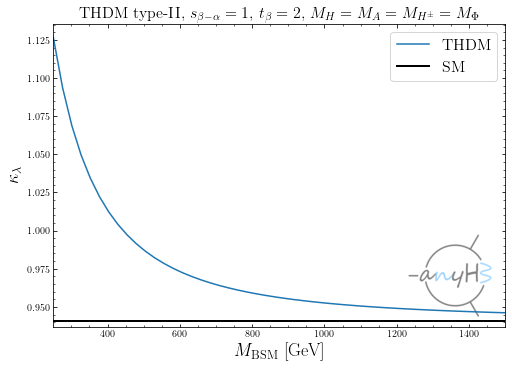

In [8]:
plot(lam2HDMval,'THDM')
plt.title(r'THDM type-II, $s_{\beta-\alpha}=1$, $t_\beta=2$, $M_H=M_A=M_{H^\pm}=M_\Phi$',fontsize=16);

## Limits of the NTHDM

In [9]:
# initialise the N2HDM in the OS scheme
N2HDM = anyBSM('NTHDM', progress = False, quiet =True, 
    ask = False # do not check interactively the PDG number of the Higgs boson
)
N2HDM.warnSSSS=False
N2HDM.set_evaluation_mode('numerical')
tb=2
a3=0.3 # result is independent of alpha3 for alpha2=pi/2
N2HDM.setparameters({
    'TanBeta': tb,
    'Mh1':95.1,
    'Mh2':125.1,
    'alpha1': np.arctan(tb)-np.pi/2-a3,
    'alpha2':np.pi/2,
    'alpha3':a3
})
lamN2HDMval=[ N2HDM.lambdahhh(parameters={
    'Mh3': MPhi,
    'MAh2':MPhi,
    'MHm2':MPhi,
    'vS': MPhi,
    'M12': (MPhi**2-249.9**2)*np.sin(np.arctan(tb))*np.cos(np.arctan(tb))
})['total'].real/norm for MPhi in Mval]

In [10]:
plot(lamN2HDMval,label='NTHDM')
plt.title(r'NTHDM type-II, $t_\beta=2$, $\alpha_1+\alpha_3=\beta-\pi/2$, $\alpha_2=\pi/2$, $M_{h_1}=M_{h_3}=M_A=M_{H^\pm}=v_S=M_\Phi$',fontsize=14);

# Complex triplet extension (Y=1)

In [11]:
# initialise the TSM in the OS scheme
TSM = anyBSM('TSM_Yeq1',quiet=True,progress=False,ask=False)

TSM.setparameters({'lam4': 2.5})
lamTSMval=[TSM.lambdahhh(parameters={'MDPP': M, 'MDP': M})['total'].real/norm for M in Mval]

In [12]:
plot(lamTSMval,label='TSM Y=1 $\lambda_4=2.5$')

# Real triplet extension (Y=0)

In [13]:
TSM0 = anyBSM('TSM_Yeq0',quiet=True,progress=False,ask=False,scheme_name="OS")

TSM0.setparameters({'LHT': 2.5})
lamTSM0val=[TSM0.lambdahhh(parameters={'MHp': M})['total'].real/norm for M in Mval]

In [14]:
plot(lamTSM0val,label='TSM Y=0')

# Inert Doublet Model (IDM)

In [15]:
# initialise the 2HDM in the OS scheme
IDM = anyBSM('IDM', progress = False, quiet = True)
IDM.setparameters({'Lam2': 2})
lamIDMval=[ IDM.lambdahhh(parameters={'Mh2': MPhi, 'MAh2':MPhi,'MHm2':MPhi,'mHu2': MPhi**2-249.9**2})['total'].real/norm for MPhi in Mval]

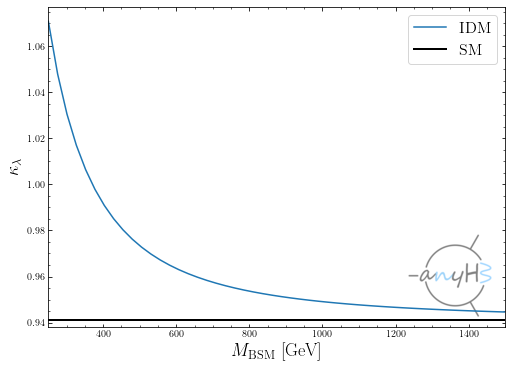

In [16]:
plot(lamIDMval,label='IDM')

# Georgi-Machacek (GM)

In [17]:
# initialise the GM in the OS scheme
GM = anyBSM('GeorgiMachacekAligned',quiet=True,progress=False,ask=False,scheme_name="OStadpoles")

lamGMval=[ GM.lambdahhh(parameters={'Mh2': MPhi, 'Meta': sqrt(MPhi**2-249.9**2),'M5':MPhi})['total'].real/norm for MPhi in Mval]

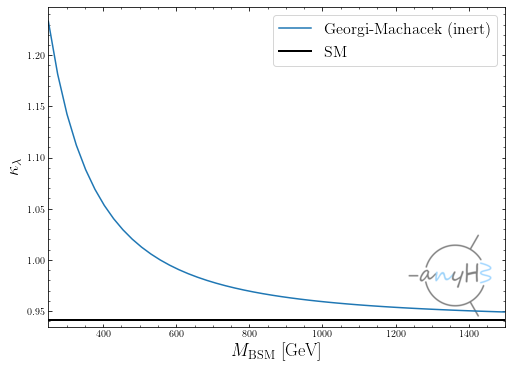

In [18]:
plot(lamGMval,label='Georgi-Machacek (inert)')

# Combine all plots

In [22]:
# all at once
plotting.anyLogo['show']=False
plt.rcParams["xtick.minor.visible"] =  True
plt.rcParams["ytick.minor.visible"] =  True
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=(6.8,4))
fig.dpi=600
ax.axhline(y=kappaSM, xmin=0,xmax=2500,color='black',lw=1,ls='-',label=r'SM')
plt.plot(Mval,lamSSMval,        c='green',  label=r'SSM') #, $\alpha=0,\, \kappa_S=\kappa_{SH}=-800$ GeV, $v_S=300$ GeV')
plt.plot(Mval,lamIDMval,  '-',  c='cornflowerblue',   label=r'IDM') #, $\sqrt{M_{\mathrm{BSM}}^2-\mu_2^2}=250$ GeV, $\lambda_2 = 2$')
plt.plot(Mval,lam2HDMval,  '-', c='blue',   label=r'THDM-II') #, $\sqrt{M_{\mathrm{BSM}}^2-M^2}=250$ GeV, $\tan\beta=2,\,\sin(\beta-\alpha)=1$')
plt.plot(Mval,lamN2HDMval, '*', c='darkblue',  label=r'NTHDM-II') #, ---"---, $v_S=M_{\mathrm{BSM}}$, $\alpha_1+\alpha_3=\beta-\pi/2$, $\alpha_2=\pi/2$')
plt.plot(Mval,lamTSM0val,       c='red',    label=r'TSM$_{Y=0}$') #, $v_T=0$, $\lambda_{SH}=2.5$')
plt.plot(Mval,lamTSMval,        c='darkorange', label=r'TSM$_{Y=1}$') # , $v_T=0$, $\lambda_4=2.5$')
plt.plot(Mval,lamGMval,         c='darkred', label=r'GeorgiMachacek') #, $\sqrt{M_{\mathrm{BSM}}^2-M_\eta^2}=250$ GeV, $M_5=M_3=M_{\mathrm{BSM}}$, $\sin(H)=0$')
# plt.text(140,6.64, 'ATLAS-CONF-2021-052')
# ax.axhline(y=6.6, xmin=0,xmax=2500,color='grey',lw=2,ls='-')
ax.set_xlim(250,1500)
ax.set_ylim(0.9,1.3)
ax.legend(loc='upper right',fontsize=14,frameon=False)
# ax.set_ylabel(r'$\kappa^{(1)}_\lambda = \frac{\lambda_{hhh}^{(1)}}{\lambda_{hhh}^{(0),\, \mathrm{SM}}}$',fontsize=20)
ax.set_ylabel(r'$\kappa_\lambda$',fontsize=14)
ax.set_xlabel(r'$M_\mathrm{BSM}$ [TeV]',fontsize=14)
# ax.set_xscale('log')
ax.set_xticks([250, 500, 750, 1000, 1250, 1500],labels=[0.25, 0.5, 0.75, 1.0, 1.25, 1.5])
# ax.set_yticks([1,2,3])
ax.set_title(r'Decoupling in $\kappa_\lambda$ in various scenarios of aligned BSM models',fontsize=14)
ax.tick_params(axis='both', which='major', length=5, labelsize=15)
ax.tick_params(axis='both', which='minor', length=3, labelsize=15)

plotting.place_logo(fig,0.83,0.68, resize=0.4, alpha=0.6, logo_name='anyH3_logo_large.png')

plt.savefig('AnyDecoupling.pdf', bbox_inches="tight",dpi=fig.dpi)
#fig.show()